<a href="https://colab.research.google.com/github/ChoiDae1/Machine-DeepLearing_Study/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10
63/63 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8360


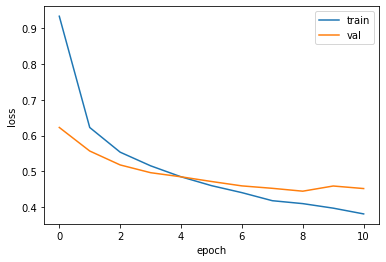

In [ ]:
from tensorflow import keras
(train_input, train_target),(train_input, train_target) =\
keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
def model_fn(a_layer=None):
      model = keras.Sequential()
      model.add(keras.layers.Flatten(input_shape=(28,28)))
      model.add(keras.layers.Dense(100, activation='relu'))
      if a_layer:
        model.add(a_layer)
      model.add(keras.layers.Dense(10, activation='softmax'))
      return model
"""model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy',optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
#드롭아웃(과대적합방지)#
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy',optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy',optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
#모델 저장과 복원#
model.save_weights('model-weights.h5')
model.save('model-whole.h5')
!ls -al *.h5
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis=1)
print(np.mean(val_labels == val_target))
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)"""
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb,early_stopping_cb])
print(early_stopping_cb.stopped_epoch)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
model.evaluate(val_scaled,val_target)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()



